In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import io

from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.optimizers import SGD, RMSprop, Adam, legacy
from tensorflow.keras import regularizers
from keras.layers import SimpleRNN, Dense, Dropout, GRU, LSTM

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

In [ ]:
uploaded = files.upload()

Saving temp_newyork_new.csv to temp_newyork_new.csv


In [ ]:
time_series = 'DATE'
target = 'TMAX'

cols = [time_series, target]

#df = pd.read_csv('dataset2.csv', encoding='latin1',  delimiter=';', usecols=cols)
df = pd.read_csv('temp_newyork_new.csv', delimiter=';', usecols=cols)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56245 entries, 0 to 56244
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    56245 non-null  object 
 1   TMAX    56238 non-null  float64
dtypes: float64(1), object(1)
memory usage: 879.0+ KB


In [ ]:
df[time_series] = pd.to_datetime(df[time_series], dayfirst=True)
#df[time_series] = df[time_series].astype('int64')
#df = df.set_index(time_series)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56245 entries, 0 to 56244
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    56245 non-null  datetime64[ns]
 1   TMAX    56238 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 879.0 KB


In [ ]:
df.isnull().sum()

DATE    0
TMAX    7
dtype: int64

In [ ]:
ready_data = df.dropna(inplace = False)
ready_data.isnull().sum()

DATE    0
TMAX    0
dtype: int64

In [ ]:
print(ready_data.head())

        DATE  TMAX
0 1869-01-01  29.0
1 1869-01-02  27.0
2 1869-01-03  35.0
3 1869-01-04  37.0
4 1869-01-05  43.0


In [ ]:
print(ready_data.tail())

            DATE  TMAX
56240 2022-12-25  28.0
56241 2022-12-26  29.0
56242 2022-12-27  35.0
56243 2022-12-28  47.0
56244 2022-12-29  51.0


In [ ]:
day_in_year = 365

plotdf = pd.DataFrame(ready_data[:day_in_year*2])
plotdf = plotdf.set_index(time_series)
plotdf.head()

,TMAX
DATE,
1869-01-01,29.0
1869-01-02,27.0
1869-01-03,35.0
1869-01-04,37.0
1869-01-05,43.0


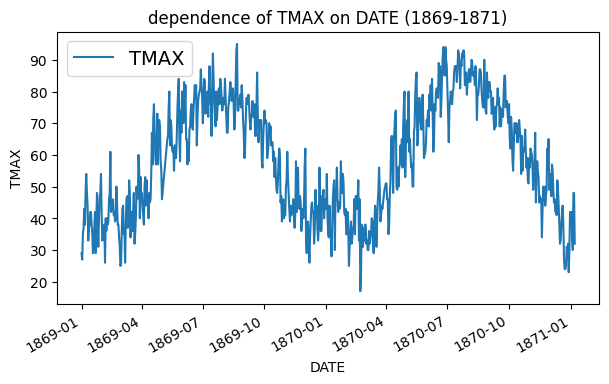

In [ ]:
plotdf.plot(figsize=(7, 4))
plt.ylabel(target)
plt.title('dependence of ' + target + ' on ' + time_series + ' (1869-1871)')
plt.legend(fontsize=14);

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(ready_data.filter([target]))
scaled_df = pd.DataFrame(scaled, columns=[target])

In [ ]:
timesteps = ready_data[time_series].to_numpy()
targetvals = ready_data[target].to_numpy()

timesteps[:10], targetvals[:10]

(array(['1869-01-01T00:00:00.000000000', '1869-01-02T00:00:00.000000000',
        '1869-01-03T00:00:00.000000000', '1869-01-04T00:00:00.000000000',
        '1869-01-05T00:00:00.000000000', '1869-01-06T00:00:00.000000000',
        '1869-01-07T00:00:00.000000000', '1869-01-08T00:00:00.000000000',
        '1869-01-09T00:00:00.000000000', '1869-01-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([29., 27., 35., 37., 43., 38., 48., 54., 48., 44.]))

In [ ]:
def get_test_and_train(col1, col2):
  return train_test_split(col1, col2, test_size=0.2, random_state=42)

In [ ]:
def get_test_and_train_data_plot(plotx_train, ploty_train, plotx_test, ploty_test):
  plt.figure(figsize=(7, 4))
  plt.scatter(plotx_train, ploty_train, s=5, label="Train data")
  plt.scatter(plotx_test, ploty_test, s=5, label="Test data")
  plt.xlabel(time_series)
  plt.xticks(rotation=90)
  plt.ylabel(target)
  plt.legend(fontsize=14)
  plt.show();

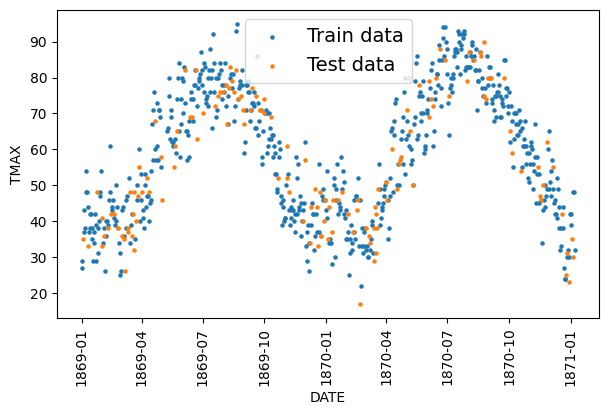

In [ ]:
plotx_train, plotx_test, ploty_train, ploty_test = get_test_and_train(timesteps[:day_in_year*2], targetvals[:day_in_year*2])
get_test_and_train_data_plot(plotx_train, ploty_train, plotx_test, ploty_test)

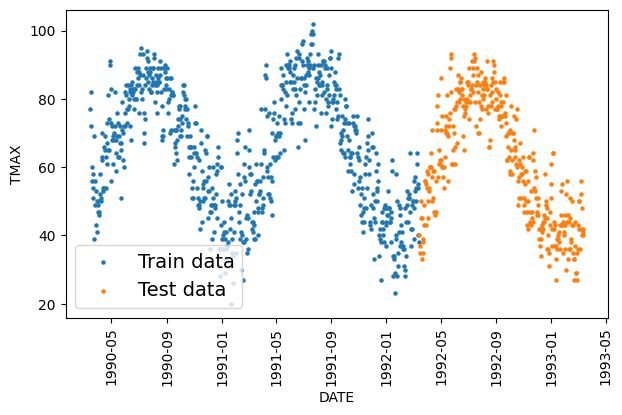

In [ ]:
split_size = int(0.8 * len(targetvals)) # 80% train, 20% test

plotx_train, ploty_train = (timesteps[:split_size])[-day_in_year*2:], (targetvals[:split_size])[-day_in_year*2:]
plotx_test, ploty_test = (timesteps[split_size:])[:day_in_year], (targetvals[split_size:])[:day_in_year]

get_test_and_train_data_plot(plotx_train, ploty_train, plotx_test, ploty_test)

In [ ]:
train_data = scaled_df[:split_size]
test_data = scaled_df[split_size:]

split_size, train_data[:10], test_data[:10]

(44990,
        TMAX
 0  0.259615
 1  0.240385
 2  0.317308
 3  0.336538
 4  0.394231
 5  0.346154
 6  0.442308
 7  0.500000
 8  0.442308
 9  0.403846,
            TMAX
 44990  0.365385
 44991  0.317308
 44992  0.336538
 44993  0.461538
 44994  0.413462
 44995  0.298077
 44996  0.413462
 44997  0.355769
 44998  0.317308
 44999  0.346154)

In [ ]:
METKA = 64

def get_seq(data):
  seq = []
  labels = []
  start = 0
  for stop in range(METKA, len(data)):
    seq.append(data.iloc[start:stop])
    labels.append(data.iloc[stop])
    start += 1
  return (np.array(seq), np.array(labels))

In [ ]:
X_train, y_train = get_seq(train_data)
X_test, y_test = get_seq(test_data)

print("Train Shape: ", X_train.shape)
print("Test Shape: ", X_test.shape)

Train Shape:  (44926, 64, 1)
Test Shape:  (11184, 64, 1)


# Определение функций

In [ ]:
def create_SimpleRNN_model(optimizer):
  model = tf.keras.models.Sequential([
      #tf.keras.layers.SimpleRNN(180, return_sequences=True, input_shape=(X_train.shape[1], 1), activation="tanh", kernel_regularizer=l1(0.01), recurrent_regularizer=l2(0.01)),
      #tf.keras.layers.SimpleRNN(120, return_sequences=False, activation="tanh", kernel_regularizer=l1(0.01), recurrent_regularizer=l2(0.01)),
      tf.keras.layers.SimpleRNN(64, input_shape = (X_train.shape[1], 1), activation="tanh"),
      #tf.keras.layers.SimpleRNN(120, return_sequences=False,  activation="tanh"),
      tf.keras.layers.Dropout(rate=0.2),
      tf.keras.layers.Dense(32),
      tf.keras.layers.Dense(1)
    ])
  model.compile(optimizer=optimizer, loss='mse', metrics=['mae','accuracy'])
  return model

In [ ]:
def create_GRU_model(optimizer):
    model = tf.keras.models.Sequential([
        tf.keras.layers.GRU(64, input_shape=(X_train.shape[1], 1), activation="tanh"),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(32),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae','accuracy'])
    return model

In [ ]:
def create_LSTM_model(optimizer):
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], 1), activation="tanh"),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(32),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae','accuracy'])
    return model

In [ ]:
optimizers = {
    'SGD': legacy.SGD(),
    'Momentum': legacy.SGD(momentum=0.9),
    #'RMSProp': RMSprop(),
    'RMSProp': legacy.RMSprop(),
    'Adam': legacy.Adam()
}

In [ ]:
def get_rnn_results(rnn_create_function, epochs_num):
  losses = {}
  y_pred_rescaled = {}

  for optimizer_name, optimizer in optimizers.items():
      model = rnn_create_function(optimizer)
      print(optimizer_name)
      #optimizer.build(model.trainable_variables)
      history = model.fit(X_train, y_train, epochs=epochs_num, batch_size=64)
      losses[optimizer_name] = history.history['loss']
      y_pred = model.predict(y_test)
      y_pred_rescaled[optimizer_name] = scaler.inverse_transform(y_pred)
      print()
      del model

  return losses, y_pred_rescaled

In [ ]:
def loses_plot(losses):
  plt.figure(figsize=(5, 5))
  for optimizer_name, loss_values in losses.items():
      plt.plot(loss_values, label=optimizer_name)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

In [ ]:
def create_plots(y_pred_rescaled):
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

  for i, (optimizer_name, optimizer) in enumerate(optimizers.items()):
      col = ax[i // 2, i % 2]
      col.plot((timesteps[:test_len])[-day_in_year*2:], y_pred_rescaled[optimizer_name][-day_in_year*2:], color='r', label='prediction', linestyle=':')
      col.plot((timesteps[:test_len])[-day_in_year*2:], y_test_rescaled[-day_in_year*2:], color='g', label='real', linestyle='-')
      #col.set_xticklabels((timesteps[:test_len])[-day_in_year*2:], rotation=90)
      col.set_title(optimizer_name)

  plt.show()

In [ ]:
test_len = y_test.shape[0]
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
def get_metrics(y_pred_rescaled):
  for i, (optimizer_name, optimizer) in enumerate(optimizers.items()):
      print('Metrics for ', optimizer_name)
      #if (optimizer_name != 'Momentum' and not momentum_friendly):
      try:
        mse = mean_squared_error(y_test_rescaled, y_pred_rescaled[optimizer_name])
        print('Mean Squared Error:', mse)

        mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled[optimizer_name])
        print('Mean Absolute Error:', mae)

        mse = mean_squared_error(y_test_rescaled, y_pred_rescaled[optimizer_name])
        rmse = np.sqrt(mse)
        print('Root Mean Squared Error:', rmse)
      except ValueError:
        print('Cant work with ', optimizer_name)

      #ValueError: continuous is not supported
      #accuracy = accuracy_score(y_test_rescaled, y_pred_rescaled[optimizer_name])
      #print('Accuracy ', accuracy)
      #precision = precision_score(y_test_rescaled, y_pred_rescaled[optimizer_name])
      #print('Precision  ', precision)
      #recall = recall_score(y_test_rescaled, y_pred_rescaled[optimizer_name])
      #print('Recall  ', recall)
      #f1 = f1_score(y_test_rescaled, y_pred_rescaled[optimizer_name])
      #print('F1 metrics  ', f1)

      print()

In [ ]:
EPOCHS_NUM_1 = 10

#Создание нейронных сетей

## SimpleRNN

In [ ]:
losses_SimpleRNN, y_pred_rescaled_SimpleRNN = get_rnn_results(create_SimpleRNN_model, EPOCHS_NUM_1)

SGD
Epoch 1/10
702/702 [==============================] - 11s 15ms/step - loss: 0.0154 - mae: 0.0957 - accuracy: 4.4518e-05
Epoch 2/10
702/702 [==============================] - 9s 13ms/step - loss: 0.0083 - mae: 0.0721 - accuracy: 4.4518e-05
Epoch 3/10
702/702 [==============================] - 10s 15ms/step - loss: 0.0070 - mae: 0.0663 - accuracy: 4.4518e-05
Epoch 4/10
702/702 [==============================] - 13s 18ms/step - loss: 0.0066 - mae: 0.0642 - accuracy: 4.4518e-05
Epoch 5/10
702/702 [==============================] - 11s 15ms/step - loss: 0.0062 - mae: 0.0621 - accuracy: 4.4518e-05
Epoch 6/10
702/702 [==============================] - 10s 15ms/step - loss: 0.0060 - mae: 0.0611 - accuracy: 4.4518e-05
Epoch 7/10
702/702 [==============================] - 9s 13ms/step - loss: 0.0058 - mae: 0.0602 - accuracy: 4.4518e-05
Epoch 8/10
702/702 [==============================] - 11s 16ms/step - loss: 0.0057 - mae: 0.0595 - accuracy: 4.4518e-05
Epoch 9/10
702/702 [==================

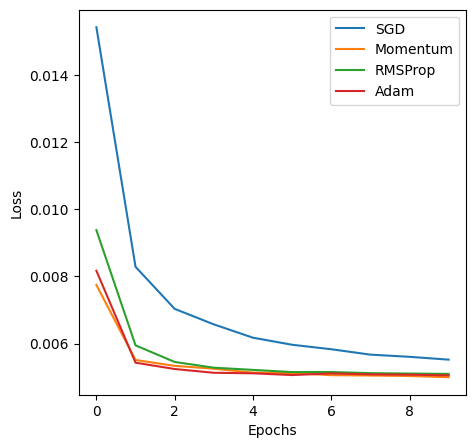

In [ ]:
loses_plot(losses_SimpleRNN)

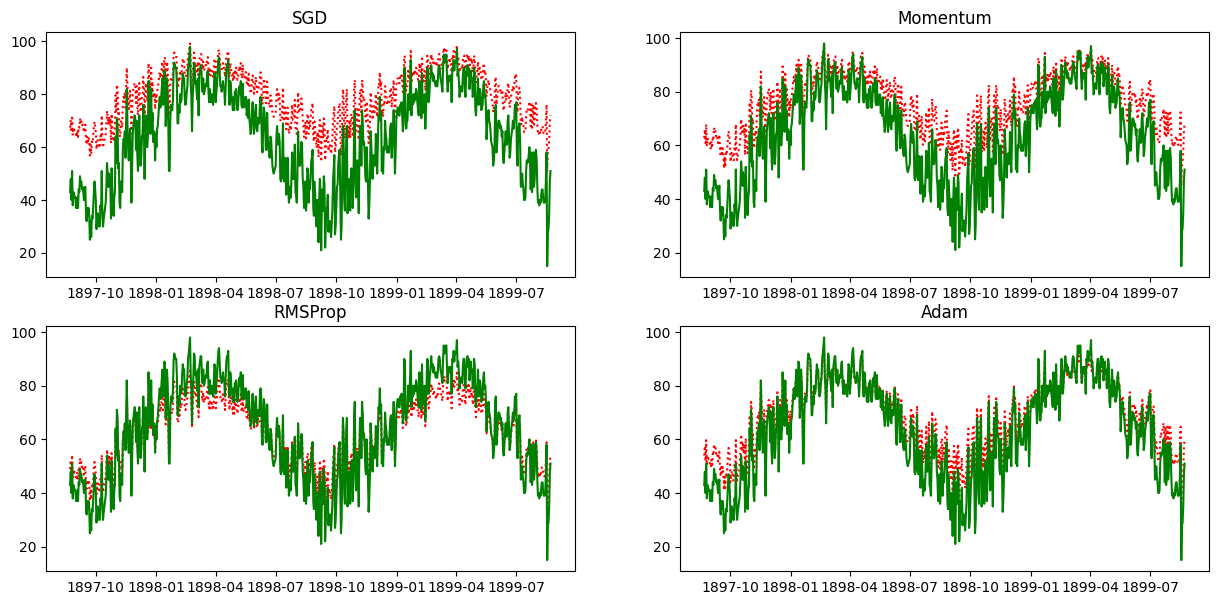

In [ ]:
create_plots(y_pred_rescaled_SimpleRNN)

In [ ]:
get_metrics(y_pred_rescaled_SimpleRNN)

Metrics for  SGD
Mean Squared Error: 312.0488862088675
Mean Absolute Error: 15.968698142765247
Root Mean Squared Error: 17.66490549674318

Metrics for  Momentum
Mean Squared Error: 198.12726309459458
Mean Absolute Error: 12.435377598149923
Root Mean Squared Error: 14.075768650222786

Metrics for  RMSProp
Mean Squared Error: 37.03326051628904
Mean Absolute Error: 5.217417065677725
Root Mean Squared Error: 6.085495913751733

Metrics for  Adam
Mean Squared Error: 54.20311848031379
Mean Absolute Error: 5.854951495946903
Root Mean Squared Error: 7.362276718537126



## GRU

In [ ]:
losses_GRU, y_pred_rescaled_GRU = get_rnn_results(create_GRU_model, EPOCHS_NUM_1)

SGD
Epoch 1/10
702/702 [==============================] - 29s 37ms/step - loss: 0.0123 - mae: 0.0863 - accuracy: 4.4518e-05
Epoch 2/10
702/702 [==============================] - 26s 37ms/step - loss: 0.0075 - mae: 0.0685 - accuracy: 4.4518e-05
Epoch 3/10
702/702 [==============================] - 26s 37ms/step - loss: 0.0067 - mae: 0.0647 - accuracy: 4.4518e-05
Epoch 4/10
702/702 [==============================] - 26s 37ms/step - loss: 0.0064 - mae: 0.0635 - accuracy: 4.4518e-05
Epoch 5/10
702/702 [==============================] - 26s 37ms/step - loss: 0.0062 - mae: 0.0624 - accuracy: 4.4518e-05
Epoch 6/10
702/702 [==============================] - 26s 38ms/step - loss: 0.0061 - mae: 0.0619 - accuracy: 4.4518e-05
Epoch 7/10
702/702 [==============================] - 26s 38ms/step - loss: 0.0060 - mae: 0.0614 - accuracy: 4.4518e-05
Epoch 8/10
702/702 [==============================] - 26s 38ms/step - loss: 0.0060 - mae: 0.0610 - accuracy: 4.4518e-05
Epoch 9/10
702/702 [================

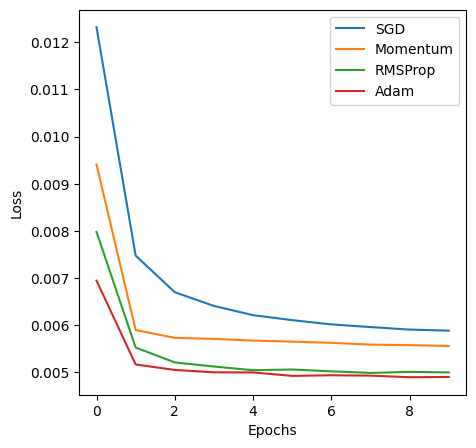

In [ ]:
loses_plot(losses_GRU)

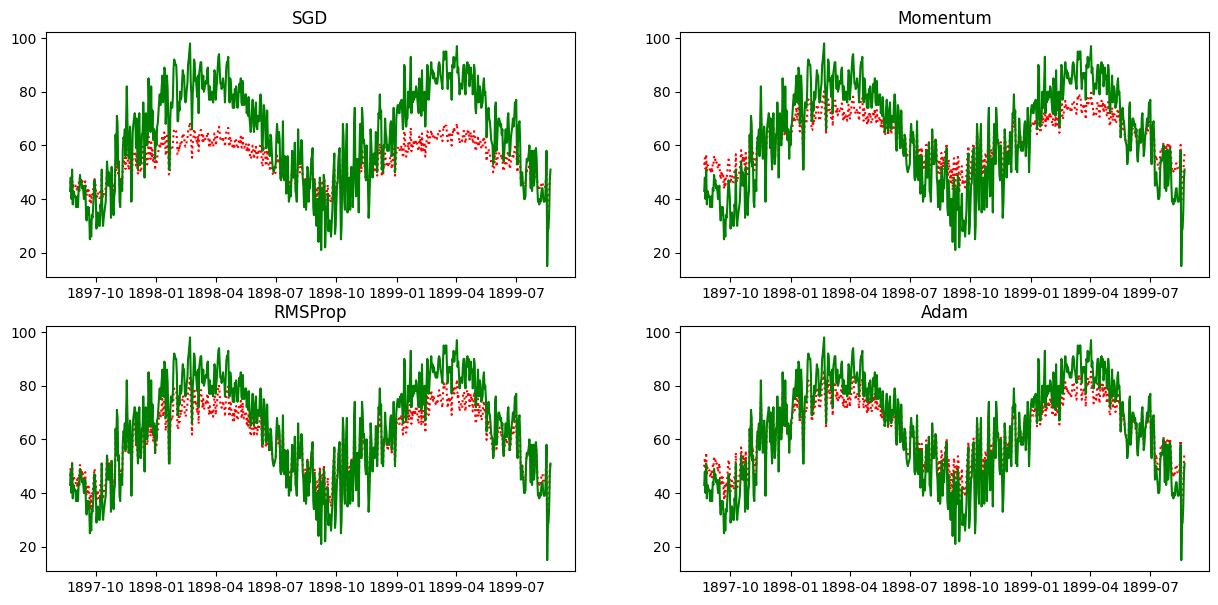

In [ ]:
create_plots(y_pred_rescaled_GRU)

In [ ]:
get_metrics(y_pred_rescaled_GRU)

Metrics for  SGD
Mean Squared Error: 191.67491221856463
Mean Absolute Error: 11.545266055242186
Root Mean Squared Error: 13.84467089600055

Metrics for  Momentum
Mean Squared Error: 82.5113513206136
Mean Absolute Error: 7.775839062719386
Root Mean Squared Error: 9.08357591043382

Metrics for  RMSProp
Mean Squared Error: 47.008390285519866
Mean Absolute Error: 5.779351780342953
Root Mean Squared Error: 6.856266497556805

Metrics for  Adam
Mean Squared Error: 38.53771614430731
Mean Absolute Error: 5.309412906098263
Root Mean Squared Error: 6.207875332535868



## LSTM

In [ ]:
losses_LSTM, y_pred_rescaled_LSTM = get_rnn_results(create_LSTM_model, EPOCHS_NUM_1)

SGD
Epoch 1/10
702/702 [==============================] - 31s 41ms/step - loss: 0.0136 - mae: 0.0899 - accuracy: 4.4518e-05
Epoch 2/10
702/702 [==============================] - 32s 45ms/step - loss: 0.0079 - mae: 0.0707 - accuracy: 4.4518e-05
Epoch 3/10
702/702 [==============================] - 27s 39ms/step - loss: 0.0073 - mae: 0.0678 - accuracy: 4.4518e-05
Epoch 4/10
702/702 [==============================] - 31s 45ms/step - loss: 0.0070 - mae: 0.0667 - accuracy: 4.4518e-05
Epoch 5/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0068 - mae: 0.0658 - accuracy: 4.4518e-05
Epoch 6/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0068 - mae: 0.0654 - accuracy: 4.4518e-05
Epoch 7/10
702/702 [==============================] - 27s 38ms/step - loss: 0.0066 - mae: 0.0647 - accuracy: 4.4518e-05
Epoch 8/10
702/702 [==============================] - 27s 38ms/step - loss: 0.0066 - mae: 0.0642 - accuracy: 4.4518e-05
Epoch 9/10
702/702 [================

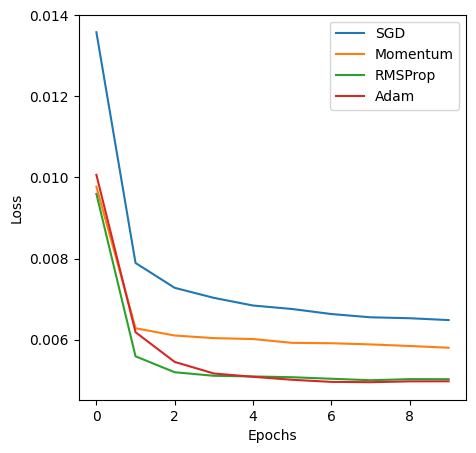

In [ ]:
loses_plot(losses_LSTM)

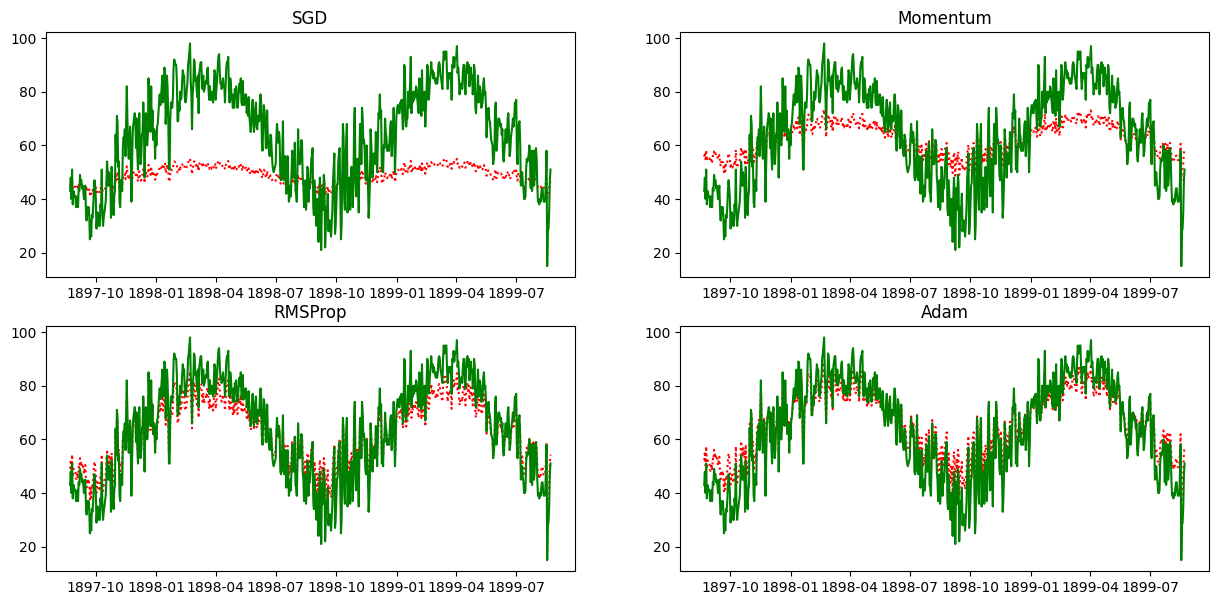

In [ ]:
create_plots(y_pred_rescaled_LSTM)

In [ ]:
get_metrics(y_pred_rescaled_LSTM)

Metrics for  SGD
Mean Squared Error: 424.22800062951546
Mean Absolute Error: 17.177338419383517
Root Mean Squared Error: 20.59679588260066

Metrics for  Momentum
Mean Squared Error: 151.59584953574287
Mean Absolute Error: 10.549552519092915
Root Mean Squared Error: 12.31242663067451

Metrics for  RMSProp
Mean Squared Error: 39.74463215681839
Mean Absolute Error: 5.405739862008156
Root Mean Squared Error: 6.304334394432008

Metrics for  Adam
Mean Squared Error: 43.69901677863193
Mean Absolute Error: 5.432278722993635
Root Mean Squared Error: 6.610523184940201



# Сравнение работы НС с L1 и L2

In [ ]:
def get_diff_metrics(y_1, y_2, y_3):
  print("                          NO REGULARIZATION         L1               L2")
  try:
    mse1 = mean_squared_error(y_test_rescaled, y_1)
    mse2 = mean_squared_error(y_test_rescaled, y_2)
    mse3 = mean_squared_error(y_test_rescaled, y_3)
    print('Mean Squared Error:      ', mse1, "  ", mse2, " ", mse3)

    mae1 = mean_absolute_error(y_test_rescaled, y_1)
    mae2 = mean_absolute_error(y_test_rescaled, y_2)
    mae3 = mean_absolute_error(y_test_rescaled, y_3)
    print('Mean Absolute Error:     ',  mae1, "  ", mae2, " ", mae3)

    rmse1 = np.sqrt(mse1)
    rmse2 = np.sqrt(mse2)
    rmse3 = np.sqrt(mse3)
    print('Root Mean Squared Error: ', rmse1, "  ", rmse2, " ", rmse3)
  except ValueError:
    print('Unexpectable Error!')

In [ ]:
def create_SimpleRNN_model_with_reg(optimizer, L1): #mode = T-> L1, mode = F ->L2
  model = tf.keras.models.Sequential()
  model.add(SimpleRNN(64, input_shape=(X_train.shape[1], 1), activation="tanh"))
  model.add(Dropout(rate=0.2))
  if (L1):
    model.add(Dense(32, kernel_regularizer=keras.regularizers.l1(0.01)))
  else:
    model.add(Dense(32, kernel_regularizer=keras.regularizers.l2(0.01)))
  model.add(Dense(1))

  model.compile(optimizer=optimizer, loss='mse', metrics=['mae','accuracy'])
  return model

In [ ]:
def create_GRU_model_with_reg(optimizer, L1):
  model = tf.keras.models.Sequential()
  model.add(GRU(64, input_shape=(X_train.shape[1], 1), activation="tanh"))
  model.add(Dropout(rate=0.2))
  if (L1):
    model.add(Dense(32, kernel_regularizer=keras.regularizers.l1(0.01)))
  else:
    model.add(Dense(32, kernel_regularizer=keras.regularizers.l2(0.01)))
  model.add(Dense(1))

  model.compile(optimizer=optimizer, loss='mse', metrics=['mae','accuracy'])
  return model

In [ ]:
def create_LSTM_model_with_reg(optimizer, L1):
  model = tf.keras.models.Sequential()
  model.add(LSTM(64, input_shape=(X_train.shape[1], 1), activation="tanh"))
  model.add(Dropout(rate=0.2))
  if (L1):
    model.add(Dense(32, kernel_regularizer=keras.regularizers.l1(0.01)))
  else:
    model.add(Dense(32, kernel_regularizer=keras.regularizers.l2(0.01)))
  model.add(Dense(1))
  model.compile(optimizer=optimizer, loss='mse', metrics=['mae','accuracy'])
  return model

In [ ]:
def create_plots_anth(y_1, y_2, y_3):
  fig, axs = plt.subplots(1, 3, figsize=(15, 4))

  axs[0].plot((timesteps[:test_len])[-day_in_year*2:], y_1[-day_in_year*2:], color='r', label='prediction', linestyle=':')
  axs[0].plot((timesteps[:test_len])[-day_in_year*2:], y_test_rescaled[-day_in_year*2:], color='g', label='real', linestyle='-')
  axs[0].set_title('NO REG')

  axs[1].plot((timesteps[:test_len])[-day_in_year*2:], y_2[-day_in_year*2:], color='r', label='prediction', linestyle=':')
  axs[1].plot((timesteps[:test_len])[-day_in_year*2:], y_test_rescaled[-day_in_year*2:], color='g', label='real', linestyle='-')
  axs[1].set_title('L1')

  axs[2].plot((timesteps[:test_len])[-day_in_year*2:], y_3[-day_in_year*2:], color='r', label='prediction', linestyle=':')
  axs[2].plot((timesteps[:test_len])[-day_in_year*2:], y_test_rescaled[-day_in_year*2:], color='g', label='real', linestyle='-')
  axs[2].set_title('L2')

  plt.show()

In [ ]:
adam_opt = 'Adam'

In [ ]:
def get_rnn_result_anth(function, param, reg, epochs):
  if not reg:
    model = function(adam_opt)
  else:
    model = function(adam_opt, param)
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=64)
  looses = history.history['loss']
  y_pred = model.predict(y_test)
  y_pred_rescaled = scaler.inverse_transform(y_pred)
  del model
  return looses, y_pred_rescaled

In [ ]:
EPOCHS_NUM = 10

##SimpleRNN

In [ ]:
loosesSRNN_1, y_pred_rescaled_SRNN_1 = get_rnn_result_anth(create_SimpleRNN_model, 0, False, EPOCHS_NUM)

Epoch 1/10
702/702 [==============================] - 14s 18ms/step - loss: 0.0095 - mae: 0.0718 - accuracy: 4.4518e-05
Epoch 2/10
702/702 [==============================] - 13s 18ms/step - loss: 0.0057 - mae: 0.0595 - accuracy: 4.4518e-05
Epoch 3/10
702/702 [==============================] - 13s 18ms/step - loss: 0.0052 - mae: 0.0570 - accuracy: 4.4518e-05
Epoch 4/10
702/702 [==============================] - 12s 18ms/step - loss: 0.0052 - mae: 0.0567 - accuracy: 4.4518e-05
Epoch 5/10
702/702 [==============================] - 13s 18ms/step - loss: 0.0051 - mae: 0.0564 - accuracy: 4.4518e-05
Epoch 6/10
702/702 [==============================] - 13s 19ms/step - loss: 0.0051 - mae: 0.0562 - accuracy: 4.4518e-05
Epoch 7/10
702/702 [==============================] - 12s 17ms/step - loss: 0.0051 - mae: 0.0559 - accuracy: 4.4518e-05
Epoch 8/10
702/702 [==============================] - 12s 17ms/step - loss: 0.0050 - mae: 0.0558 - accuracy: 4.4518e-05
Epoch 9/10
702/702 [====================

In [ ]:
#modelSRNN_1 = create_SimpleRNN_model(adam_opt)
#history = modelSRNN_1.fit(X_train, y_train, epochs=10, batch_size=64)
#loosesSRNN_1 = history.history['loss']
#y_pred = modelSRNN_1.predict(y_test)
#y_pred_rescaled_SRNN_1 = scaler.inverse_transform(y_pred)

In [ ]:
loosesSRNN_L1, y_pred_rescaled_SRNN_L1 = get_rnn_result_anth(create_SimpleRNN_model_with_reg, True, True, EPOCHS_NUM)

Epoch 1/10
702/702 [==============================] - 13s 17ms/step - loss: 0.3672 - mae: 0.0883 - accuracy: 2.2259e-05
Epoch 2/10
702/702 [==============================] - 11s 16ms/step - loss: 0.0154 - mae: 0.0751 - accuracy: 4.4518e-05
Epoch 3/10
702/702 [==============================] - 12s 18ms/step - loss: 0.0139 - mae: 0.0725 - accuracy: 4.4518e-05
Epoch 4/10
702/702 [==============================] - 12s 16ms/step - loss: 0.0134 - mae: 0.0714 - accuracy: 4.4518e-05
Epoch 5/10
702/702 [==============================] - 11s 16ms/step - loss: 0.0127 - mae: 0.0698 - accuracy: 4.4518e-05
Epoch 6/10
702/702 [==============================] - 22s 31ms/step - loss: 0.0123 - mae: 0.0685 - accuracy: 4.4518e-05
Epoch 7/10
702/702 [==============================] - 12s 17ms/step - loss: 0.0119 - mae: 0.0671 - accuracy: 4.4518e-05
Epoch 8/10
702/702 [==============================] - 12s 17ms/step - loss: 0.0116 - mae: 0.0661 - accuracy: 4.4518e-05
Epoch 9/10
702/702 [====================

In [ ]:
loosesSRNN_L2, y_pred_rescaled_SRNN_L2 = get_rnn_result_anth(create_SimpleRNN_model_with_reg, False, True, EPOCHS_NUM)

Epoch 1/10
702/702 [==============================] - 13s 17ms/step - loss: 0.1810 - mae: 0.0797 - accuracy: 4.4518e-05
Epoch 2/10
702/702 [==============================] - 12s 17ms/step - loss: 0.0156 - mae: 0.0613 - accuracy: 4.4518e-05
Epoch 3/10
702/702 [==============================] - 12s 18ms/step - loss: 0.0064 - mae: 0.0593 - accuracy: 4.4518e-05
Epoch 4/10
702/702 [==============================] - 12s 17ms/step - loss: 0.0060 - mae: 0.0588 - accuracy: 4.4518e-05
Epoch 5/10
702/702 [==============================] - 11s 16ms/step - loss: 0.0058 - mae: 0.0578 - accuracy: 4.4518e-05
Epoch 6/10
702/702 [==============================] - 12s 17ms/step - loss: 0.0057 - mae: 0.0577 - accuracy: 4.4518e-05
Epoch 7/10
702/702 [==============================] - 12s 17ms/step - loss: 0.0057 - mae: 0.0573 - accuracy: 4.4518e-05
Epoch 8/10
702/702 [==============================] - 12s 17ms/step - loss: 0.0057 - mae: 0.0575 - accuracy: 4.4518e-05
Epoch 9/10
702/702 [====================

In [ ]:
#modelSRNN_2 = create_SimpleRNN_model_with_reg(adam_opt)
#history = modelSRNN_2.fit(X_train, y_train, epochs=10, batch_size=64)
#loosesSRNN_2 = history.history['loss']
#y_pred = modelSRNN_2.predict(y_test)
#y_pred_rescaled_SRNN_2 = scaler.inverse_transform(y_pred)

In [ ]:
get_diff_metrics(y_pred_rescaled_SRNN_1, y_pred_rescaled_SRNN_L1, y_pred_rescaled_SRNN_L2)

                          NO REGULARIZATION         L1               L2
Mean Squared Error:       80.4871164893173    280.41845796723925   162.93435804261904
Mean Absolute Error:      7.166534594029657    13.673999335462273   10.64004102558196
Root Mean Squared Error:  8.97146122375376    16.74569968580708   12.764574338481445


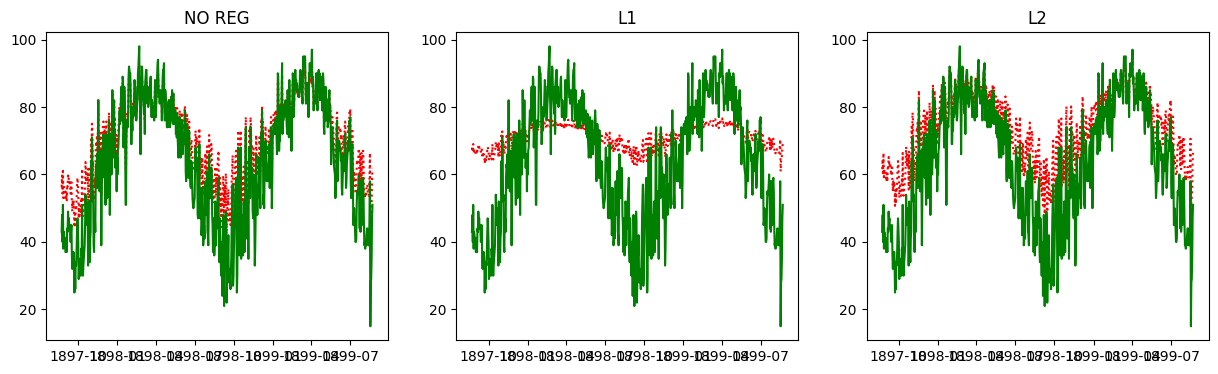

In [ ]:
create_plots_anth(y_pred_rescaled_SRNN_1, y_pred_rescaled_SRNN_L1, y_pred_rescaled_SRNN_L2)

##GRU

In [ ]:
loosesGRU_1, y_pred_rescaled_GRU_1 = get_rnn_result_anth(create_GRU_model, 0, False, EPOCHS_NUM)

Epoch 1/10
702/702 [==============================] - 29s 37ms/step - loss: 0.0101 - mae: 0.0732 - accuracy: 4.4518e-05
Epoch 2/10
702/702 [==============================] - 27s 38ms/step - loss: 0.0055 - mae: 0.0585 - accuracy: 4.4518e-05
Epoch 3/10
702/702 [==============================] - 26s 37ms/step - loss: 0.0051 - mae: 0.0561 - accuracy: 4.4518e-05
Epoch 4/10
702/702 [==============================] - 26s 37ms/step - loss: 0.0050 - mae: 0.0557 - accuracy: 4.4518e-05
Epoch 5/10
702/702 [==============================] - 27s 39ms/step - loss: 0.0050 - mae: 0.0555 - accuracy: 4.4518e-05
Epoch 6/10
702/702 [==============================] - 27s 39ms/step - loss: 0.0050 - mae: 0.0552 - accuracy: 4.4518e-05
Epoch 7/10
702/702 [==============================] - 27s 39ms/step - loss: 0.0049 - mae: 0.0549 - accuracy: 4.4518e-05
Epoch 8/10
702/702 [==============================] - 27s 39ms/step - loss: 0.0049 - mae: 0.0550 - accuracy: 4.4518e-05
Epoch 9/10
702/702 [====================

In [ ]:
#modelGRU_1 = create_GRU_model(adam_opt)
#history = modelGRU_1.fit(X_train, y_train, epochs=10, batch_size=64)
#loosesSRNN_1 = history.history['loss']
#y_pred = modelSRNN_1.predict(y_test)
#y_pred_rescaled_SRNN_1 = scaler.inverse_transform(y_pred)

In [ ]:
loosesGRU_L1, y_pred_rescaled_GRU_L1 = get_rnn_result_anth(create_GRU_model_with_reg, True, True, EPOCHS_NUM)

Epoch 1/10
702/702 [==============================] - 30s 40ms/step - loss: 0.3737 - mae: 0.0848 - accuracy: 4.4518e-05
Epoch 2/10
702/702 [==============================] - 27s 39ms/step - loss: 0.0151 - mae: 0.0740 - accuracy: 4.4518e-05
Epoch 3/10
702/702 [==============================] - 27s 38ms/step - loss: 0.0132 - mae: 0.0711 - accuracy: 4.4518e-05
Epoch 4/10
702/702 [==============================] - 29s 41ms/step - loss: 0.0127 - mae: 0.0699 - accuracy: 4.4518e-05
Epoch 5/10
702/702 [==============================] - 27s 39ms/step - loss: 0.0121 - mae: 0.0687 - accuracy: 4.4518e-05
Epoch 6/10
702/702 [==============================] - 26s 37ms/step - loss: 0.0118 - mae: 0.0678 - accuracy: 4.4518e-05
Epoch 7/10
702/702 [==============================] - 27s 38ms/step - loss: 0.0115 - mae: 0.0667 - accuracy: 4.4518e-05
Epoch 8/10
702/702 [==============================] - 29s 41ms/step - loss: 0.0113 - mae: 0.0657 - accuracy: 4.4518e-05
Epoch 9/10
702/702 [====================

In [ ]:
loosesGRU_L2, y_pred_rescaled_GRU_L2 = get_rnn_result_anth(create_GRU_model_with_reg, False, True, EPOCHS_NUM)

Epoch 1/10
702/702 [==============================] - 31s 39ms/step - loss: 0.0748 - mae: 0.0710 - accuracy: 4.4518e-05
Epoch 2/10
702/702 [==============================] - 28s 39ms/step - loss: 0.0068 - mae: 0.0622 - accuracy: 4.4518e-05
Epoch 3/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0062 - mae: 0.0595 - accuracy: 4.4518e-05
Epoch 4/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0058 - mae: 0.0577 - accuracy: 4.4518e-05
Epoch 5/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0056 - mae: 0.0567 - accuracy: 4.4518e-05
Epoch 6/10
702/702 [==============================] - 30s 42ms/step - loss: 0.0055 - mae: 0.0561 - accuracy: 4.4518e-05
Epoch 7/10
702/702 [==============================] - 27s 39ms/step - loss: 0.0054 - mae: 0.0559 - accuracy: 4.4518e-05
Epoch 8/10
702/702 [==============================] - 29s 41ms/step - loss: 0.0053 - mae: 0.0558 - accuracy: 4.4518e-05
Epoch 9/10
702/702 [====================

In [ ]:
get_diff_metrics(y_pred_rescaled_GRU_1, y_pred_rescaled_GRU_L1, y_pred_rescaled_GRU_L2)

                          NO REGULARIZATION         L1               L2
Mean Squared Error:       39.40985382685486    178.74576862092593   89.44685231925024
Mean Absolute Error:      5.383140307468747    11.243652205951566   7.789667742446769
Root Mean Squared Error:  6.277726804095162    13.369583711579278   9.457634604870831


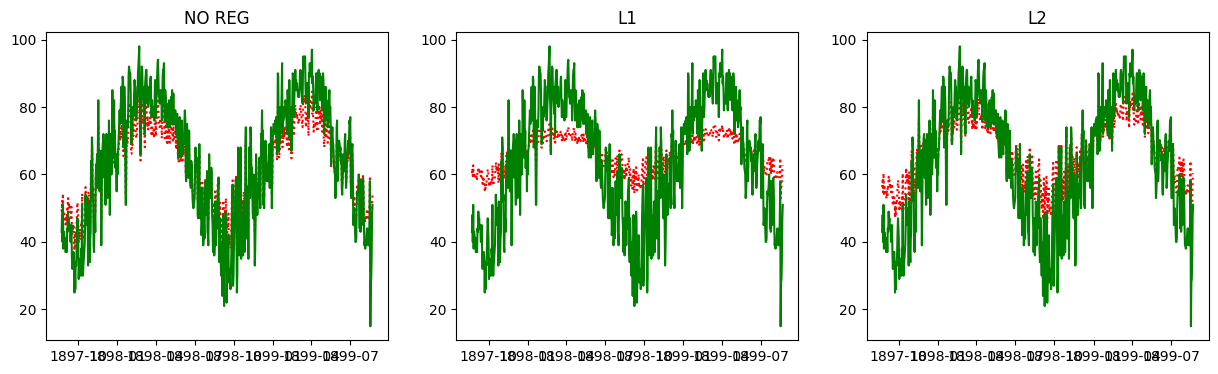

In [ ]:
create_plots_anth(y_pred_rescaled_GRU_1, y_pred_rescaled_GRU_L1, y_pred_rescaled_GRU_L2)

##LSTM

In [ ]:
loosesLSTM_1, y_pred_rescaled_LSTM_1 = get_rnn_result_anth(create_LSTM_model, 0, False, EPOCHS_NUM)

Epoch 1/10
702/702 [==============================] - 30s 39ms/step - loss: 0.0084 - mae: 0.0711 - accuracy: 4.4518e-05
Epoch 2/10
702/702 [==============================] - 30s 42ms/step - loss: 0.0058 - mae: 0.0602 - accuracy: 4.4518e-05
Epoch 3/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0052 - mae: 0.0568 - accuracy: 4.4518e-05
Epoch 4/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0051 - mae: 0.0560 - accuracy: 4.4518e-05
Epoch 5/10
702/702 [==============================] - 29s 41ms/step - loss: 0.0050 - mae: 0.0555 - accuracy: 4.4518e-05
Epoch 6/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0050 - mae: 0.0557 - accuracy: 4.4518e-05
Epoch 7/10
702/702 [==============================] - 29s 41ms/step - loss: 0.0050 - mae: 0.0554 - accuracy: 4.4518e-05
Epoch 8/10
702/702 [==============================] - 28s 39ms/step - loss: 0.0050 - mae: 0.0553 - accuracy: 4.4518e-05
Epoch 9/10
702/702 [====================

In [ ]:
loosesLSTM_L1, y_pred_rescaled_LSTM_L1 = get_rnn_result_anth(create_LSTM_model_with_reg, True, True, EPOCHS_NUM)

Epoch 1/10
702/702 [==============================] - 31s 41ms/step - loss: 0.3721 - mae: 0.0904 - accuracy: 4.4518e-05
Epoch 2/10
702/702 [==============================] - 29s 42ms/step - loss: 0.0165 - mae: 0.0771 - accuracy: 4.4518e-05
Epoch 3/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0140 - mae: 0.0731 - accuracy: 4.4518e-05
Epoch 4/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0133 - mae: 0.0717 - accuracy: 4.4518e-05
Epoch 5/10
702/702 [==============================] - 27s 38ms/step - loss: 0.0128 - mae: 0.0704 - accuracy: 4.4518e-05
Epoch 6/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0126 - mae: 0.0698 - accuracy: 4.4518e-05
Epoch 7/10
702/702 [==============================] - 29s 41ms/step - loss: 0.0121 - mae: 0.0687 - accuracy: 4.4518e-05
Epoch 8/10
702/702 [==============================] - 28s 39ms/step - loss: 0.0119 - mae: 0.0678 - accuracy: 4.4518e-05
Epoch 9/10
702/702 [====================

In [ ]:
loosesLSTM_L2, y_pred_rescaled_LSTM_L2 = get_rnn_result_anth(create_LSTM_model_with_reg, False, True, EPOCHS_NUM)

Epoch 1/10
702/702 [==============================] - 29s 39ms/step - loss: 0.0764 - mae: 0.0748 - accuracy: 4.4518e-05
Epoch 2/10
702/702 [==============================] - 27s 39ms/step - loss: 0.0078 - mae: 0.0674 - accuracy: 4.4518e-05
Epoch 3/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0070 - mae: 0.0640 - accuracy: 4.4518e-05
Epoch 4/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0066 - mae: 0.0618 - accuracy: 4.4518e-05
Epoch 5/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0063 - mae: 0.0599 - accuracy: 4.4518e-05
Epoch 6/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0061 - mae: 0.0588 - accuracy: 4.4518e-05
Epoch 7/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0059 - mae: 0.0579 - accuracy: 4.4518e-05
Epoch 8/10
702/702 [==============================] - 28s 40ms/step - loss: 0.0057 - mae: 0.0574 - accuracy: 4.4518e-05
Epoch 9/10
702/702 [====================

In [ ]:
get_diff_metrics(y_pred_rescaled_LSTM_1, y_pred_rescaled_LSTM_L1, y_pred_rescaled_LSTM_L2)

                          NO REGULARIZATION         L1               L2
Mean Squared Error:       42.985889914811914    296.84596786742327   144.341762765163
Mean Absolute Error:      5.583936915036094    14.769502571553462   9.721232360354138
Root Mean Squared Error:  6.556362552117745    17.229218434607628   12.014231676023357


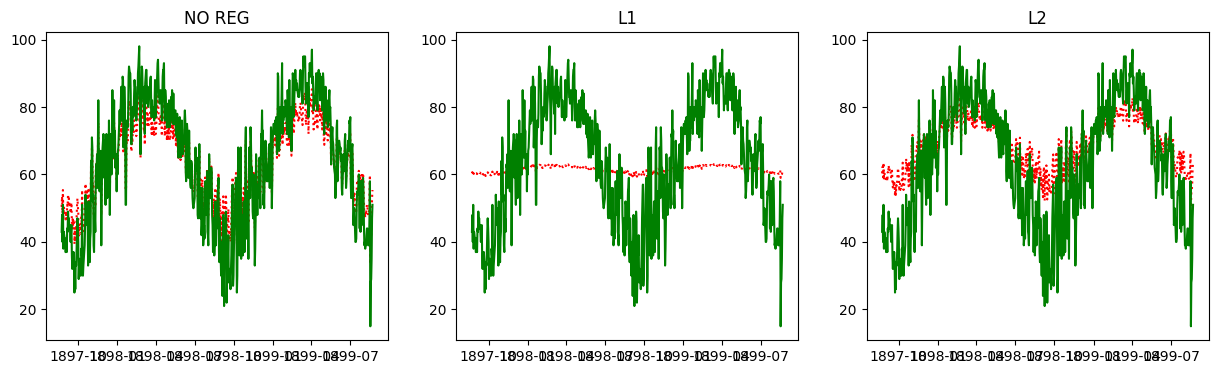

In [ ]:
create_plots_anth(y_pred_rescaled_LSTM_1, y_pred_rescaled_LSTM_L1, y_pred_rescaled_LSTM_L2)

In [ ]:
losses = {}
y_pred_rescaled = {}

for optimizer_name, optimizer in optimizers.items():
    #model = tf.keras.models.Sequential([
    #  #tf.keras.layers.SimpleRNN(180, return_sequences=True, input_shape=(X_train.shape[1], 1), activation="tanh", kernel_regularizer=l1(0.01), recurrent_regularizer=l2(0.01)),
    #  #tf.keras.layers.SimpleRNN(120, return_sequences=False, activation="tanh", kernel_regularizer=l1(0.01), recurrent_regularizer=l2(0.01)),
    #  tf.keras.layers.SimpleRNN(180, return_sequences=True, input_shape = (X_train.shape[1], 1), activation="tanh"),
    #  tf.keras.layers.SimpleRNN(120, return_sequences=False,  activation="tanh"),
    #  tf.keras.layers.Dense(60),
    #  tf.keras.layers.Dropout(rate=0.2),
    #  tf.keras.layers.Dense(30),
    #  tf.keras.layers.Dropout(rate=0.1),
    #  tf.keras.layers.Dense(1)
    #])

    #model.compile(optimizer=optimizer, loss='mse', metrics=['mae','accuracy'])

    model = create_SimpleRNN_model(optimizer)
    print(optimizer_name)
    #optimizer.build(model.trainable_variables)
    history = model.fit(X_train, y_train, epochs=20, batch_size=64)
    losses[optimizer_name] = history.history['loss']
    y_pred = model.predict(y_test)
    y_pred_rescaled[optimizer_name] = scaler.inverse_transform(y_pred)
    print()
    del model

SGD
Epoch 1/20
703/703 [==============================] - 68s 92ms/step - loss: 0.2083 - mae: 0.2118 - accuracy: 2.2257e-05
Epoch 2/20
703/703 [==============================] - 66s 93ms/step - loss: 0.0354 - mae: 0.1591 - accuracy: 2.2257e-05
Epoch 3/20
703/703 [==============================] - 69s 97ms/step - loss: 0.0332 - mae: 0.1544 - accuracy: 2.2257e-05
Epoch 4/20
703/703 [==============================] - 66s 94ms/step - loss: 0.0290 - mae: 0.1436 - accuracy: 4.4514e-05
Epoch 5/20
703/703 [==============================] - 65s 93ms/step - loss: 0.0236 - mae: 0.1252 - accuracy: 4.4514e-05
Epoch 6/20
703/703 [==============================] - 70s 100ms/step - loss: 0.0195 - mae: 0.1124 - accuracy: 4.4514e-05
Epoch 7/20
703/703 [==============================] - 65s 92ms/step - loss: 0.0152 - mae: 0.0992 - accuracy: 4.4514e-05
Epoch 8/20
703/703 [==============================] - 64s 91ms/step - loss: 0.0122 - mae: 0.0884 - accuracy: 4.4514e-05
Epoch 9/20
703/703 [===============

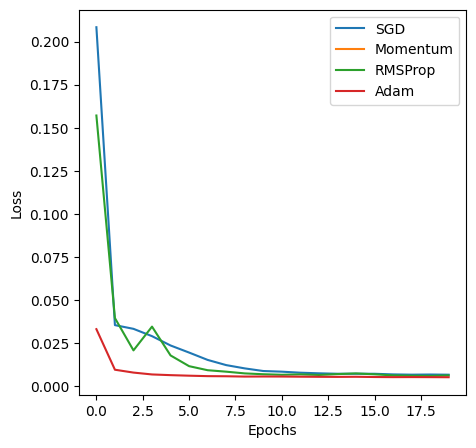

In [ ]:
plt.figure(figsize=(5, 5))
for optimizer_name, loss_values in losses.items():
    plt.plot(loss_values, label=optimizer_name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_len = y_test.shape[0]
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

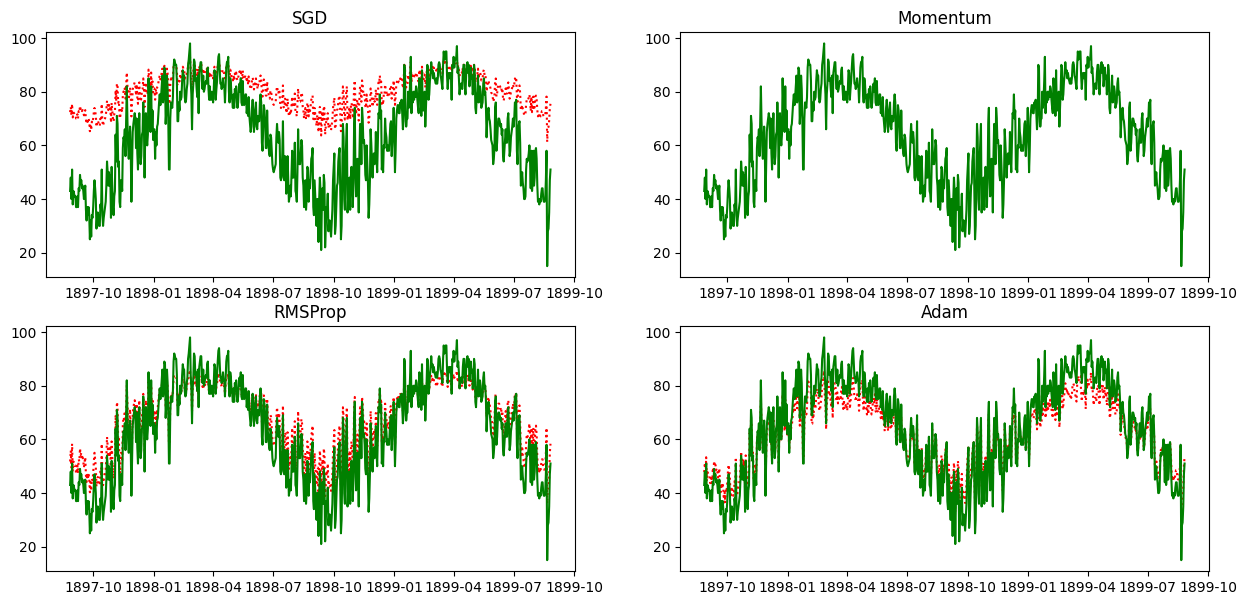

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

for i, (optimizer_name, optimizer) in enumerate(optimizers.items()):
    col = ax[i // 2, i % 2]
    col.plot((timesteps[:test_len])[-day_in_year*2:], y_pred_rescaled[optimizer_name][-day_in_year*2:], color='r', label='prediction', linestyle=':')
    col.plot((timesteps[:test_len])[-day_in_year*2:], y_test_rescaled[-day_in_year*2:], color='g', label='real', linestyle='-')
    #col.set_xticklabels((timesteps[:test_len])[-day_in_year*2:], rotation=90)
    col.set_title(optimizer_name)

plt.show()

In [ ]:
for i, (optimizer_name, optimizer) in enumerate(optimizers.items()):
  if (optimizer_name != 'Momentum'):
    print('Metrics for ', optimizer_name)

    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled[optimizer_name])
    print('Mean Squared Error:', mse)

    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled[optimizer_name])
    print('Mean Absolute Error:', mae)

    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled[optimizer_name])
    rmse = np.sqrt(mse)
    print('Root Mean Squared Error:', rmse)

    #ValueError: continuous is not supported
    #accuracy = accuracy_score(y_test_rescaled, y_pred_rescaled[optimizer_name])
    #print('Accuracy ', accuracy)
    #precision = precision_score(y_test_rescaled, y_pred_rescaled[optimizer_name])
    #print('Precision  ', precision)
    #recall = recall_score(y_test_rescaled, y_pred_rescaled[optimizer_name])
    #print('Recall  ', recall)
    #f1 = f1_score(y_test_rescaled, y_pred_rescaled[optimizer_name])
    #print('F1 metrics  ', f1)

    print()


Metrics for  SGD
Mean Squared Error: 411.74036040021696
Mean Absolute Error: 17.06598460695596
Root Mean Squared Error: 20.29138635973937

Metrics for  RMSProp
Mean Squared Error: 45.92946968786088
Mean Absolute Error: 5.808284279445175
Root Mean Squared Error: 6.777128424920165

Metrics for  Adam
Mean Squared Error: 33.427273012546294
Mean Absolute Error: 4.936487454962296
Root Mean Squared Error: 5.781632383033903



In [ ]:
#model_SRNN.compile(optimizer ='adam', loss='mse', metrics=['mae','accuracy'])
#history_SRNN_adam = model_SRNN.fit(X_train, y_train, epochs=10, batch_size=64)

#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1, validation_data=(X_test, y_test),)

In [ ]:
#plt.plot(history_SRNN_adam.history['loss'], label='training loss')
#plt.xlabel('Epochs')
#plt.legend()
#plt.show()